#### Improvement
correlation and feature understanding
simple feature manipulation,like multiply, divide based on understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

In [4]:
training_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
training_label = training_data['time']
data_corr = training_data.corr()['time']

In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
col_drop.index

Index(['l1_ratio', 'random_state', 'n_features', 'scale'], dtype='object')

In [34]:
all_data = pd.concat([training_data.drop('time',axis=1), test_data.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)

In [35]:
#all_data = pd.get_dummies(all_data)

In [36]:
all_data.loc[all_data['n_jobs'] == -1, 'n_jobs'] = 8
all_data

,penalty,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y
0,none,0.0001,659,8,737,9,2,11,0.060257
1,l2,0.0001,395,8,243,7,3,7,0.059768
2,l1,0.0010,488,8,718,4,4,7,0.096493
3,l2,0.0010,501,4,713,10,5,10,0.032356
4,l2,0.0010,879,4,173,8,5,12,0.003609
5,none,0.0001,669,4,438,5,3,10,0.021112
6,l2,0.0100,259,2,577,7,2,7,0.020114
7,elasticnet,0.0010,503,2,964,2,3,9,0.062695
8,elasticnet,0.0100,206,2,212,6,4,7,0.013455
9,l2,0.0010,815,8,375,4,3,7,0.094464


In [37]:
pls = pd.Series(range(3), index=all_data.groupby('alpha').count().index)
all_data['alpha'].replace(pls, inplace=True)

In [45]:
pd.concat([all_data.iloc[:40, :], training_label], axis=1).corr()

,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples,time
alpha,1.000000,0.021633,-0.237581,0.088407,-0.103141,0.080518,0.158878,-0.320177,0.222888,0.061573,0.159422
max_iter,0.021633,1.000000,0.238881,-0.057803,-0.204532,0.230508,0.257183,0.085561,-0.049686,0.651788,0.268352
n_jobs,-0.237581,0.238881,1.000000,-0.040385,-0.038572,-0.079244,-0.350213,0.292952,-0.606066,0.087251,-0.252574
n_samples,0.088407,-0.057803,-0.040385,1.000000,0.108893,-0.216336,0.062691,0.328629,0.561974,0.622049,0.360832
n_classes,-0.103141,-0.204532,-0.038572,0.108893,1.000000,-0.078284,0.257059,-0.011639,0.006254,0.035077,0.215037
n_clusters_per_class,0.080518,0.230508,-0.079244,-0.216336,-0.078284,1.000000,0.262700,-0.194119,-0.116384,-0.082830,-0.207023
n_informative,0.158878,0.257183,-0.350213,0.062691,0.257059,0.262700,1.000000,-0.194895,0.253468,0.282802,0.256682
flip_y,-0.320177,0.085561,0.292952,0.328629,-0.011639,-0.194119,-0.194895,1.000000,0.028160,0.336292,0.188342
n_samples_n_jobs,0.222888,-0.049686,-0.606066,0.561974,0.006254,-0.116384,0.253468,0.028160,1.000000,0.376571,0.645970
max_iter_n_samples,0.061573,0.651788,0.087251,0.622049,0.035077,-0.082830,0.282802,0.336292,0.376571,1.000000,0.622201


In [39]:
#all_data1 = all_data.copy()
#all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)

In [40]:
pd.concat([all_data['n_samples'].iloc[:40]/all_data['n_jobs'].iloc[:40] , training_label], axis=1).corr()

,0,time
0,1.00000,0.64597
time,0.64597,1.00000


In [41]:
pd.concat([all_data['max_iter'].iloc[:40]*all_data['n_samples'].iloc[:40] , training_label], axis=1).corr()

,0,time
0,1.000000,0.622201
time,0.622201,1.000000


In [42]:
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']

In [44]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data

,penalty,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples
0,none,-1.161826,0.564199,0.440146,-0.285518,1.138775,-1.201805,1.378967,0.256812,-0.550484,0.156669
1,l2,-1.161826,-0.461366,0.440146,-1.159407,0.361075,-0.306844,-0.961098,0.239967,-0.714359,-0.996895
2,l1,0.070414,-0.100087,0.440146,-0.319129,-0.805475,0.588117,-0.961098,1.506184,-0.556787,-0.243837
3,l2,0.070414,-0.049586,-0.440146,-0.327974,1.527625,1.483078,0.793951,-0.705135,-0.321921,-0.223622
4,l2,0.070414,1.418837,-0.440146,-1.283237,0.749925,1.483078,1.963983,-1.696282,-0.680191,-0.830884
5,none,-1.161826,0.603047,-0.440146,-0.814450,-0.416625,-0.306844,0.793951,-1.092819,-0.504373,-0.413637
6,l2,1.302653,-0.989687,-0.880291,-0.568559,0.361075,-1.201805,-0.961098,-1.127219,-0.029333,-0.838652
7,elasticnet,0.070414,-0.041816,-0.880291,0.116047,-1.583175,-0.306844,0.208934,0.340878,0.484187,0.154327
8,elasticnet,1.302653,-1.195577,-0.880291,-1.214246,-0.027775,0.588117,-0.961098,-1.356826,-0.513661,-1.151750
9,l2,0.070414,1.170215,0.440146,-0.925898,-0.805475,-0.306844,-0.961098,1.436216,-0.670571,-0.376330


In [142]:
new_data = pd.get_dummies(all_data)
test_training = len(training_data) - 38
training_len = 38 #len(training_df_data)-test_training
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

In [143]:
all_data3 = new_data.copy()
all_data3 -= all_data3.mean() 
df_pca = pd.DataFrame(np.mat(all_data3.values).T * np.mat(all_data3.values))

In [144]:
X_train

,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
0,-1.161826,0.564199,0.440146,-0.285518,1.138775,-1.201805,1.378967,0.256812,-0.550484,0.156669,0,0,0,1
1,-1.161826,-0.461366,0.440146,-1.159407,0.361075,-0.306844,-0.961098,0.239967,-0.714359,-0.996895,0,0,1,0
2,0.070414,-0.100087,0.440146,-0.319129,-0.805475,0.588117,-0.961098,1.506184,-0.556787,-0.243837,0,1,0,0
3,0.070414,-0.049586,-0.440146,-0.327974,1.527625,1.483078,0.793951,-0.705135,-0.321921,-0.223622,0,0,1,0
4,0.070414,1.418837,-0.440146,-1.283237,0.749925,1.483078,1.963983,-1.696282,-0.680191,-0.830884,0,0,1,0
5,-1.161826,0.603047,-0.440146,-0.814450,-0.416625,-0.306844,0.793951,-1.092819,-0.504373,-0.413637,0,0,0,1
6,1.302653,-0.989687,-0.880291,-0.568559,0.361075,-1.201805,-0.961098,-1.127219,-0.029333,-0.838652,0,0,1,0
7,0.070414,-0.041816,-0.880291,0.116047,-1.583175,-0.306844,0.208934,0.340878,0.484187,0.154327,1,0,0,0
8,1.302653,-1.195577,-0.880291,-1.214246,-0.027775,0.588117,-0.961098,-1.356826,-0.513661,-1.151750,1,0,0,0
9,0.070414,1.170215,0.440146,-0.925898,-0.805475,-0.306844,-0.961098,1.436216,-0.670571,-0.376330,0,0,1,0


In [145]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [146]:
from sklearn.linear_model import Ridge

In [147]:
params = np.linspace(0.5,10,num=50)
test_scores = []
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.33it/s]


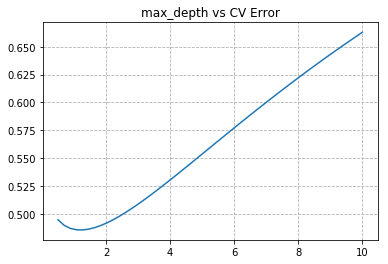

In [148]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [150]:
clf2 = Ridge(alpha=1)
clf2.fit(X_train, y_train) 

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
y_train_test_pre = clf2.predict(X_train_test)
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 242.64


In [152]:
clf2.predict(x_test)

array([ 1.62557467,  2.7343982 , -0.8894181 ,  0.53609717,  1.00715664,
        1.23394033,  1.0264144 ,  0.46548524,  3.14780197,  1.18184696,
        3.66037673,  5.57280144,  1.67286399,  6.15155847,  0.21001837,
        0.78865373,  0.88042579,  3.03151397,  2.13503147,  2.40310283,
        0.40207834, -0.24649797,  0.35217679,  0.95017198,  1.17743781,
        0.70723555,  2.61430108, -0.56992443,  2.08583448,  1.62181388,
        2.49296681,  0.76105923, -0.45533688,  1.23314149,  2.28465929,
       -0.09692275,  1.44130463,  0.65494692,  1.29587958,  1.64177773,
        1.74554302,  1.79248814,  2.61549943,  2.21915462,  0.16795017,
        0.43889007,  1.74663198,  0.57335096,  2.33354541,  0.35352321,
        0.3379859 ,  2.70797333, -1.30860268,  2.6192157 ,  3.01865839,
       -1.10827352,  1.72758622,  1.65998132, -1.86871467,  2.85213671,
        1.4513568 ,  2.84206213,  1.12279021,  2.79066925,  2.21047095,
        1.71122304,  2.29996269,  1.58358195,  3.34869994,  2.49

In [153]:
y_train

0     0.610638
1     0.207025
2     0.908545
3     0.803611
4     0.402432
5     0.503008
6     0.502612
7     2.848688
8     0.305260
9     0.206063
10    0.201903
11    0.302688
12    0.101962
13    0.503875
14    0.202588
15    0.506875
16    0.272583
17    0.307642
18    0.335938
19    0.154123
20    0.022681
21    1.905080
22    0.680450
23    0.303454
24    0.603783
25    0.904220
26    0.178184
27    3.908816
28    0.505279
29    0.905071
30    0.303614
31    5.216220
32    0.606585
33    2.631711
34    0.102612
35    0.702824
36    0.107581
37    0.403540
Name: time, dtype: float64

In [154]:
from sklearn.neighbors import KNeighborsRegressor

In [155]:
params = range(2,10)
test_scores = []
for param in tqdm(params):
    #clf = XGBClassifier(max_depth=param)
    neigh = KNeighborsRegressor(n_neighbors=param)
    test_score = cross_val_score(neigh, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.57it/s]


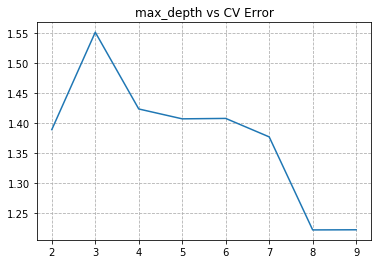

In [156]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [157]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [163]:
rst = clf2.predict(x_test)

In [164]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [168]:
rt.columns = ['id', 'time']
rt[rt<0]=0.45

In [169]:
rt.to_csv("./submissionv2_ridge_median.csv")

In [ ]:
def bootstrap(dataframe,count):
    n = len(dataframe)
    num_list = []
    init_num = np.random.randint(0,n,1)
    num_list.append(int(init_num[0]))
    df = pd.DataFrame(data.loc[init_num])
    for i in range(count - 1):
        num = np.random.randint(0,n,1)
        num_list.append(int(num[0]))
        new_df = pd.DataFrame(data.loc[num])
        df = pd.concat([df,new_df], axis = 0)
    return df, num_list